# 爬虫原理与技术

## 一.爬虫实现原理

### 1.通用爬虫工作原理

通用爬虫是一个自动提取网页程序的程序,它为搜索引擎从Internet上下载网页,<b>是搜索引擎的重要组成部分</b>

通用爬虫从一个或若干初始网页的URL开始,获得初始网页上的URL,在爬取网页的过程中,不断从当前页面上抽取新的URL放入队列,直到满足系统的停止条件

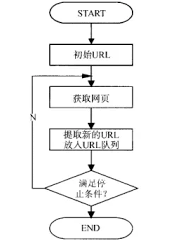

In [3]:
from IPython.display import Image

Image(filename="./data/2_1.png",width=500)

搜索引擎是通用爬虫的最重要应用领域.介绍搜索引擎的主要工作流程：
1. 爬取网页
2. 数据存储
3. 预处理
4. 提供检索服务,网站排名

### 2.聚焦爬虫工作原理

聚焦爬虫需要根据一定的网页分析算法过滤与主题无关的链接,保留有用的链接,并将其放入等待爬取的URL队列.然后它将根据一定的搜索策略从队列中选择下一步要爬取的网页URL,并重复上述过程,直到达到系统的某一条件时停止

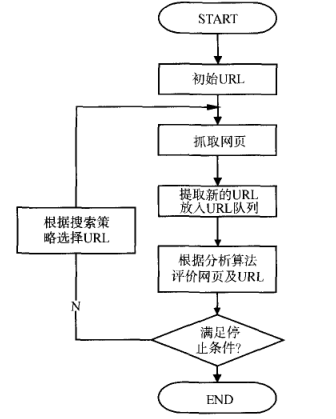

In [4]:
Image(filename="./data/2_2.png",width=500)

相对于通用网络爬虫,聚焦爬虫需要解决3个重要问题：
1. 对爬取目标的描述或定义
2. 对网页或数据的分析与过滤
3. 对URL的搜索策略

## 二.通用爬虫相关网站文件

通过网站本身提供的<b>robots.txt</b>和<b>sitemap.xml</b>

### 1.robots.txt文件

网站通过一个符合Robots协议的<b>robots.txt</b>文件来告诉搜索引擎哪些页面可以爬取,那些页面不能爬取.<b>robots.txt</b>文件是搜索引擎访问网站时要查看的第一个文件.一般情况下,该文件一一行或多行`User-agent`记录开始,后面再跟若干行`Disallow`记录.实例如下：

In [9]:
import urllib.request

response=urllib.request.urlopen("https://www.taobao.com/robots.txt")

robots=response.read().decode("utf-8")

print(robots)

User-agent:  Baiduspider
Allow:  /article
Allow:  /oshtml
Allow:  /ershou
Allow: /$
Disallow:  /product/
Disallow:  /

User-Agent:  Googlebot
Allow:  /article
Allow:  /oshtml
Allow:  /product
Allow:  /spu
Allow:  /dianpu
Allow:  /oversea
Allow:  /list
Allow:  /ershou
Allow: /$
Disallow:  /

User-agent:  Bingbot
Allow:  /article
Allow:  /oshtml
Allow:  /product
Allow:  /spu
Allow:  /dianpu
Allow:  /oversea
Allow:  /list
Allow:  /ershou
Allow: /$
Disallow:  /

User-Agent:  360Spider
Allow:  /article
Allow:  /oshtml
Allow:  /ershou
Disallow:  /

User-Agent:  Yisouspider
Allow:  /article
Allow:  /oshtml
Allow:  /ershou
Disallow:  /

User-Agent:  Sogouspider
Allow:  /article
Allow:  /oshtml
Allow:  /product
Allow:  /ershou
Disallow:  /

User-Agent:  Yahoo!  Slurp
Allow:  /product
Allow:  /spu
Allow:  /dianpu
Allow:  /oversea
Allow:  /list
Allow:  /ershou
Allow: /$
Disallow:  /

User-Agent:  *
Disallow:  /


- User-agent：该项的值用于描述搜索引擎robot的名字.在`robots.txt`文件中,至少要有一条`User-agent`记录.如果有多条`User-agent`记录,则说明有多个robot会受到该协议的限制.若该项的值设为"*",则该协议对任何搜索引擎均有效,且这样的记录只能有一条

- Disallow：该项的值用于描述不希望被访问到的一个URL,这个URL可以是一条完整的路径,也可以是部分路径.任何一条`Disallow`记录为空,都说明该网站的所有部分都允许被访问.在`robots.txt`文件中,至少要有一条Disallow记录

- Allow：该项的值用于描述希望被访问的一组URL

<b>注意</b>：`robots.txt`文件必须放置在一个站点的根目录下,而且文件名必须全部小写

### 2.sitemap.xml文件

为了方便网站管理员通知爬虫遍历和更新网站的内容,而无须爬取每个网页,网站提供了`sitemap.xml`文件(网站地图)

## 三.防爬虫应对策略

### 1.设置User-Agent

`User-Agent`表示用户代理,是HTTP协议中的一个字段,其作用是描述发出HTTP请求的终端信息,如操作系统及版本,浏览器及版本等,服务器通过这个字段可以知道访问网站的用户

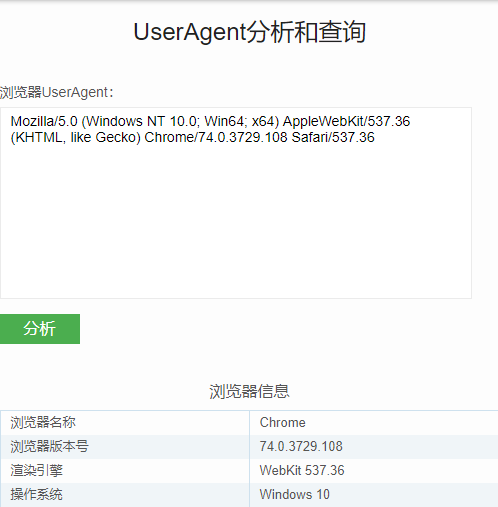

In [11]:
Image(filename="./data/2_3.png",width=500)

### 2.使用代理IP

所谓代理IP就是介于用户和网站之间的第三者,即用户先将请求发送给代理IP,之后代理IP再发送到服务器,这时服务器会将代理IP视为爬虫IP,同时用多个代理IP,可以降低单个IP地址的访问量,就能防止爬虫爬取数据的概率

### 3.降低访问频率

python中提供`time`模块,使程序执行完,暂时休息若干秒,调用函数`sleep()`即可

### 4.验证码限制